# *The Secret of Us* album by Gracie Abrams: An Exploratory Data Analysis 🎵

In [13]:
import lyricsgenius as lg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import json


In [8]:
file = open("lyrics.txt", "w")

In [9]:
genius = lg.Genius('qfk_VdrKIRG3cRYt0yBAO5KBv0wtAOfYJtW__lJKv14lM1vUKHpoTtX7yTEY54FL', skip_non_songs=True, excluded_terms=["(Remix)", "(Live)"], remove_section_headers=True)

In [12]:
album = genius.search_album("The Secret of Us", "Gracie Abrams")
album.save_lyrics()

Searching for "The Secret of Us" by Gracie Abrams...
Wrote Lyrics_TheSecretofUs.json.


In [16]:
# Load JSON data
with open('Lyrics_TheSecretOfUs.json', 'r') as file:
    album_data = json.load(file)

# Extract lyrics and song titles
lyrics_data = []
for track in album_data['tracks']:
    song = track['song']
    lyrics_data.append({'title': song['title'], 'lyrics': song['lyrics']})

# Create a DataFrame
df = pd.DataFrame(lyrics_data)

In [17]:
df.head()

,title,lyrics
0,Felt Good About You,I felt good about you 'til I didn't\nCrossed l...
1,Risk,"Look at me now\nSaid I wouldn't do it, but I h..."
2,Blowing Smoke,I cut the rope and you fell from the tower\nI ...
3,"I Love You, I’m Sorry","Two Augusts ago\nI told the truth, oh, but you..."
4,​us.,I know you know\nIt felt just like a joke\nI s...


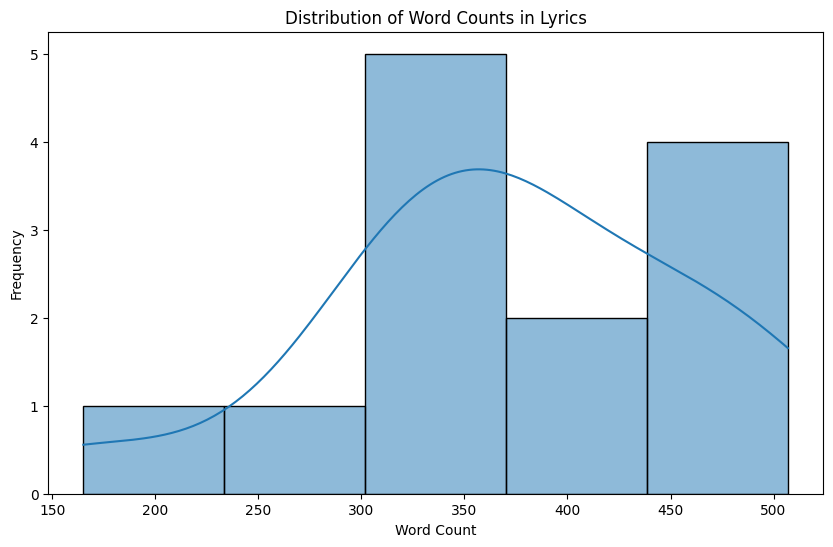

In [20]:
# Word count per song
df['Word Count'] = df['lyrics'].apply(lambda x: len(x.split()))

# Plot word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Word Count'], kde=True)
plt.title('Distribution of Word Counts in Lyrics')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()